In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('train.tsv.zip','r') as zipref:
    zipref.extractall('./')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.tsv',sep='\t')

In [3]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
len(df)

156060

In [5]:
df.drop_duplicates(subset="SentenceId",keep='first',inplace=True)

In [6]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


In [7]:
len(df)

8529

In [8]:
seqlen=df['Phrase'].apply(lambda x: len(x.split()))

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

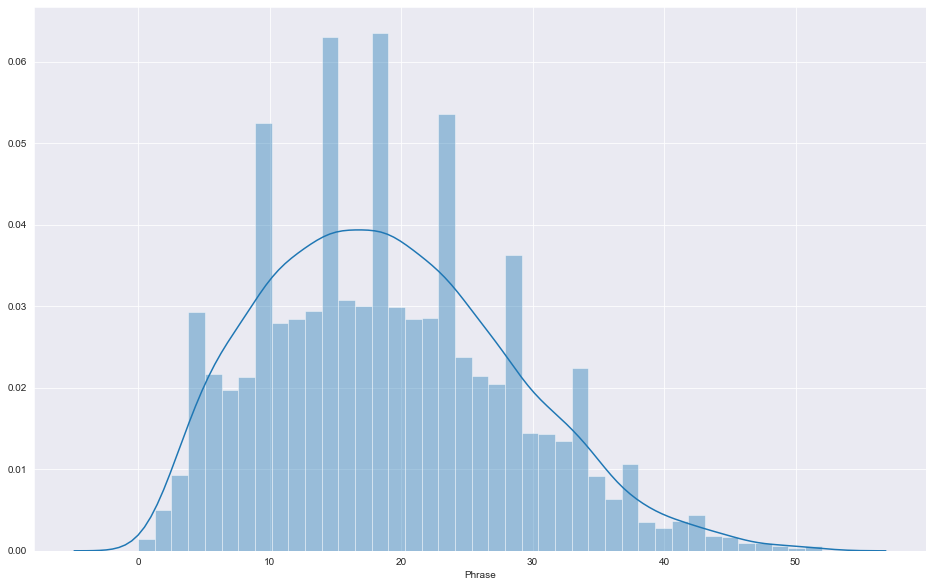

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(seqlen)

In [11]:
SEQ_LEN = 50

In [12]:
from transformers import AutoTokenizer

In [13]:
tokenizer=AutoTokenizer.from_pretrained('bert-base-cased')

In [14]:
tokens = tokenizer.encode_plus("hello world",max_length=SEQ_LEN,truncation=True,padding="max_length",
                              add_special_tokens=True,return_token_type_ids=False,return_attention_mask=True,return_tensors='tf')

In [15]:
tokens

{'input_ids': <tf.Tensor: id=0, shape=(1, 50), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: id=1, shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])>}

In [16]:
import numpy as np

In [17]:
Xids=np.zeros((len(df),SEQ_LEN))
Xmask=np.zeros((len(df),SEQ_LEN))

In [18]:
Xids.shape

(8529, 50)

In [19]:
Xmask.shape

(8529, 50)

In [20]:
for i, sequence in enumerate(df['Phrase']):
    tokens = tokenizer.encode_plus(sequence,max_length=SEQ_LEN,truncation=True,padding="max_length",
                              add_special_tokens=True,return_token_type_ids=False,return_attention_mask=True,return_tensors='tf')
    Xids[i,:],Xmask[i,:]=tokens['input_ids'],tokens['attention_mask']
    

In [21]:
Xids

array([[ 101.,  138., 1326., ...,    0.,    0.,    0.],
       [ 101., 1188., 3589., ...,    0.,    0.,    0.],
       [ 101., 2431., 3899., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  118.,  149., ...,    0.,    0.,    0.],
       [ 101., 1109., 2523., ...,    0.,    0.,    0.],
       [ 101., 1109., 1273., ...,    0.,    0.,    0.]])

In [22]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [23]:
df['Sentiment'].unique

<bound method Series.unique of 0         1
63        4
81        1
116       3
156       1
         ..
155984    2
155997    2
156021    1
156031    1
156039    2
Name: Sentiment, Length: 8529, dtype: int64>

In [24]:
arr=df['Sentiment'].values
arr.size

8529

In [25]:
labels=np.zeros((arr.size,arr.max()+1))
labels.shape

(8529, 5)

In [26]:
labels[np.arange(arr.size),arr]=1
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [27]:
with open('xids.npy','wb')as f:
    np.save(f,Xids)
with open('xmask.npy','wb')as f:
    np.save(f,Xmask)
with open('labels.npy','wb')as f:
    np.save(f,labels)
del df,Xids,Xmask,labels

In [28]:
with open('xids.npy','rb')as fp:
    Xids=np.load(fp)
with open('xmask.npy','rb')as fp:
    Xmask=np.load(fp)
with open('labels.npy','rb')as fp:
    labels=np.load(fp)


In [29]:
Xids

array([[ 101.,  138., 1326., ...,    0.,    0.,    0.],
       [ 101., 1188., 3589., ...,    0.,    0.,    0.],
       [ 101., 2431., 3899., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  118.,  149., ...,    0.,    0.,    0.],
       [ 101., 1109., 2523., ...,    0.,    0.,    0.],
       [ 101., 1109., 1273., ...,    0.,    0.,    0.]])

In [30]:
import tensorflow as tf

In [31]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [32]:
dataset = tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))

In [33]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: id=17072, shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, <tf.Tensor: id=17073, shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>, <tf.Tensor: id=17074, shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [34]:
def map_func(input_ids,masks,labels):
    return {'input_ids':input_ids,'attention_mask':masks},labels

In [35]:
dataset=dataset.map(map_func)

In [37]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: id=17092, shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, 'attention_mask': <tf.Tensor: id=17091, shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>}, <tf.Tensor: id=17093, shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [38]:
dataset = dataset.shuffle(100000).batch(32)

In [39]:
DS_LEN=len(list(dataset))

In [40]:
DS_LEN

267

In [41]:
SPLIT = .9
train=dataset.take(round(DS_LEN*SPLIT))
val=dataset.skip(round(DS_LEN*SPLIT))
del dataset

In [45]:
from transformers import AutoModel

In [55]:
bert = AutoModel.from_pretrained('bert-base-cased')


In [62]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')
embeddings = bert(input_ids, attention_mask=mask)

AttributeError: 'Tensor' object has no attribute 'size'

AttributeError: 'Tensor' object has no attribute 'size'

In [ ]:
X = tf.keras.layers.LSTM(64)(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(X)
